# Notebook for preparing and saving MNIST graphs

In [1]:
import numpy as np
import torch
import pickle
import time
import os
%matplotlib inline
import matplotlib.pyplot as plt


# Download MNIST dataset

In [2]:
if not os.path.isfile('superpixels.zip'):
    print('downloading..')
    !curl https://www.dropbox.com/s/y2qwa77a0fxem47/superpixels.zip?dl=1 -o superpixels.zip -J -L -k
    !unzip superpixels.zip -d ../
    # !tar -xvf superpixels.zip -C ../
else:
    print('File already downloaded')

downloading..


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   122    0   122    0     0    378      0 --:--:-- --:--:-- --:--:--   378

100   342  100   342    0     0    597      0 --:--:-- --:--:-- --:--:--   597

  0  324M    0 15574    0     0  13016      0  7:15:44  0:00:01  7:15:43 13016
 13  324M   13 43.5M    0     0  19.8M      0  0:00:16  0:00:02  0:00:14 43.8M
 35  324M   35  115M    0     0  36.3M      0  0:00:08  0:00:03  0:00:05 58.2M
 56  324M   56  183M    0     0  43.7M      0  0:00:07  0:00:04  0:00:03 61.2M
 79  324M   79  257M    0     0  49.5M      0  0:00:06  0:00:05  0:00:01 64.4M
 99  324M   99  324M    0     0  52.3M      0  0:00:06  0:00:06 --:--:-- 64.9M
100  324M  100  324M    0     0  52.4M      0  0:

Archive:  superpixels.zip
 extracting: ../superpixels/cifar10_150sp_test.pkl  
 extracting: ../superpixels/cifar10_150sp_train.pkl  
 extracting: ../superpixels/mnist_75sp_test.pkl  
 extracting: ../superpixels/mnist_75sp_train.pkl  


# Convert to DGL format and save with pickle

In [4]:
import os
os.chdir('../../') # go to root folder of the project
print(os.getcwd())


c:\Users\Ronaj.Pradhan\Univeristy of South Dakota\Graph Neural Network\my_gnn


In [5]:
import pickle

%load_ext autoreload
%autoreload 2

from data.superpixels import SuperPixDatasetDGL 

from data.data import LoadData
from torch.utils.data import DataLoader
from data.superpixels import SuperPixDataset


Using backend: pytorch


In [6]:
start = time.time()

DATASET_NAME = 'LUNGS'
dataset = SuperPixDatasetDGL(DATASET_NAME) 

print('Time (sec):',time.time() - start) # 356s=6min


Adj matrix defined from super-pixel locations + features
preparing 141 graphs for the TEST set...


c:\Users\Ronaj.Pradhan\AppData\Local\miniconda3\envs\benchmark_gnn\lib\site-packages\dgl\base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


preparing 563 graphs for the TRAIN set...
[I] Data load time: 45.3872s
Time (sec): 45.38723015785217


In [7]:
dataset.train[0]

(Graph(num_nodes=179, num_edges=1432,
       ndata_schemes={'feat': Scheme(shape=(3,), dtype=torch.float16)}
       edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float16)}),
 tensor(0))

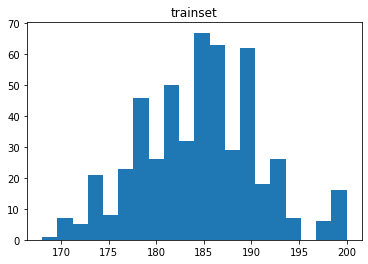

nb/min/max : 513 168 200


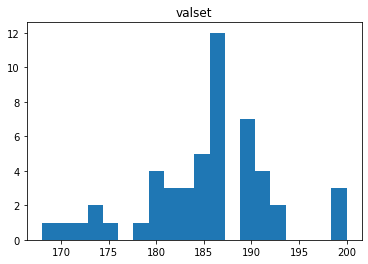

nb/min/max : 50 168 200


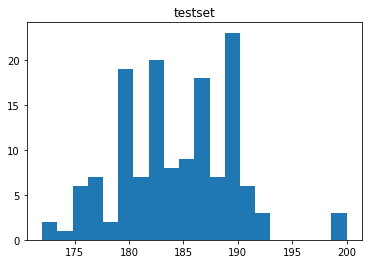

nb/min/max : 141 172 200


In [8]:
def plot_histo_graphs(dataset, title):
    # histogram of graph sizes
    graph_sizes = []
    for graph in dataset:
        graph_sizes.append(graph[0].number_of_nodes())
        #graph_sizes.append(graph[0].number_of_edges())
    plt.figure(1)
    plt.hist(graph_sizes, bins=20)
    plt.title(title)
    plt.show()
    graph_sizes = torch.Tensor(graph_sizes)
    print('nb/min/max :',len(graph_sizes),graph_sizes.min().long().item(),graph_sizes.max().long().item())
    
plot_histo_graphs(dataset.train,'trainset')
plot_histo_graphs(dataset.val,'valset')
plot_histo_graphs(dataset.test,'testset')


In [9]:
print(len(dataset.train))
print(len(dataset.val))
print(len(dataset.test))

print(dataset.train[0])
print(dataset.val[0])
print(dataset.test[0])


513
50
141
(Graph(num_nodes=179, num_edges=1432,
      ndata_schemes={'feat': Scheme(shape=(3,), dtype=torch.float16)}
      edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float16)}), tensor(0))
(Graph(num_nodes=183, num_edges=1464,
      ndata_schemes={'feat': Scheme(shape=(3,), dtype=torch.float16)}
      edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float16)}), tensor(0))
(Graph(num_nodes=187, num_edges=1496,
      ndata_schemes={'feat': Scheme(shape=(3,), dtype=torch.float16)}
      edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float16)}), tensor(1))


In [10]:
start = time.time()

with open('data/superpixels/LUNGS.pkl','wb') as f:
        pickle.dump([dataset.train,dataset.val,dataset.test],f)
        
print('Time (sec):',time.time() - start) # 38s


Time (sec): 0.32826995849609375


# Test load function

In [11]:
DATASET_NAME = 'LUNGS'
dataset = LoadData(DATASET_NAME) # 54s
trainset, valset, testset = dataset.train, dataset.val, dataset.test


[I] Loading dataset LUNGS...
LUNGS
train, test, val sizes : 513 141 50
[I] Finished loading.
[I] Data load time: 0.2632s


In [12]:
start = time.time()

batch_size = 10
collate = SuperPixDataset.collate
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, collate_fn=collate)

print('Time (sec):',time.time() - start) # 0.0003s


Time (sec): 0.000997304916381836
